# import library packages 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
df=pd.read_csv("database.csv")

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
df.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


# Data Preprocessing

In [6]:
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [8]:
df['Type'].unique

<bound method Series.unique of 0        Earthquake
1        Earthquake
2        Earthquake
3        Earthquake
4        Earthquake
            ...    
23407    Earthquake
23408    Earthquake
23409    Earthquake
23410    Earthquake
23411    Earthquake
Name: Type, Length: 23412, dtype: object>

In [9]:
!pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 11.9 MB/s eta 0:00:00
     --------------------------------------- 22.0/22.0 MB 12.8 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 14.6 MB/s eta 0:00:00


In [10]:
import geopandas as gpd
from shapely.geometry import Point

#Contains the world map boundaries
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [11]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [12]:
data = df[['Latitude', 'Longitude','Magnitude']]
data.head()

,Latitude,Longitude,Magnitude
0,19.246,145.616,6.0
1,1.863,127.352,5.8
2,-20.579,-173.972,6.2
3,-59.076,-23.557,5.8
4,11.938,126.427,5.8


In [13]:
print("Minimum magnitude: ",data["Magnitude"].min())
print("Maximum magnitude: ",data["Magnitude"].max())

Minimum magnitude:  5.5
Maximum magnitude:  9.1


In [14]:
#Make a new column with the coordinates
data['Coordinates'] = list(zip(data.Longitude, data.Latitude))
data.head()

,Latitude,Longitude,Magnitude,Coordinates
0,19.246,145.616,6.0,"(145.616, 19.246)"
1,1.863,127.352,5.8,"(127.352, 1.863)"
2,-20.579,-173.972,6.2,"(-173.972, -20.579)"
3,-59.076,-23.557,5.8,"(-23.557, -59.076)"
4,11.938,126.427,5.8,"(126.427, 11.938)"


In [15]:
data['Coordinates'] = data['Coordinates'].apply(Point)
data.head()

,Latitude,Longitude,Magnitude,Coordinates
0,19.246,145.616,6.0,POINT (145.616 19.246)
1,1.863,127.352,5.8,POINT (127.352 1.863)
2,-20.579,-173.972,6.2,POINT (-173.972 -20.579)
3,-59.076,-23.557,5.8,POINT (-23.557 -59.076)
4,11.938,126.427,5.8,POINT (126.427 11.938)


In [16]:
#Convert the pandas dataframe to geopandas dataframe
gdf = gpd.GeoDataFrame(data, geometry='Coordinates')

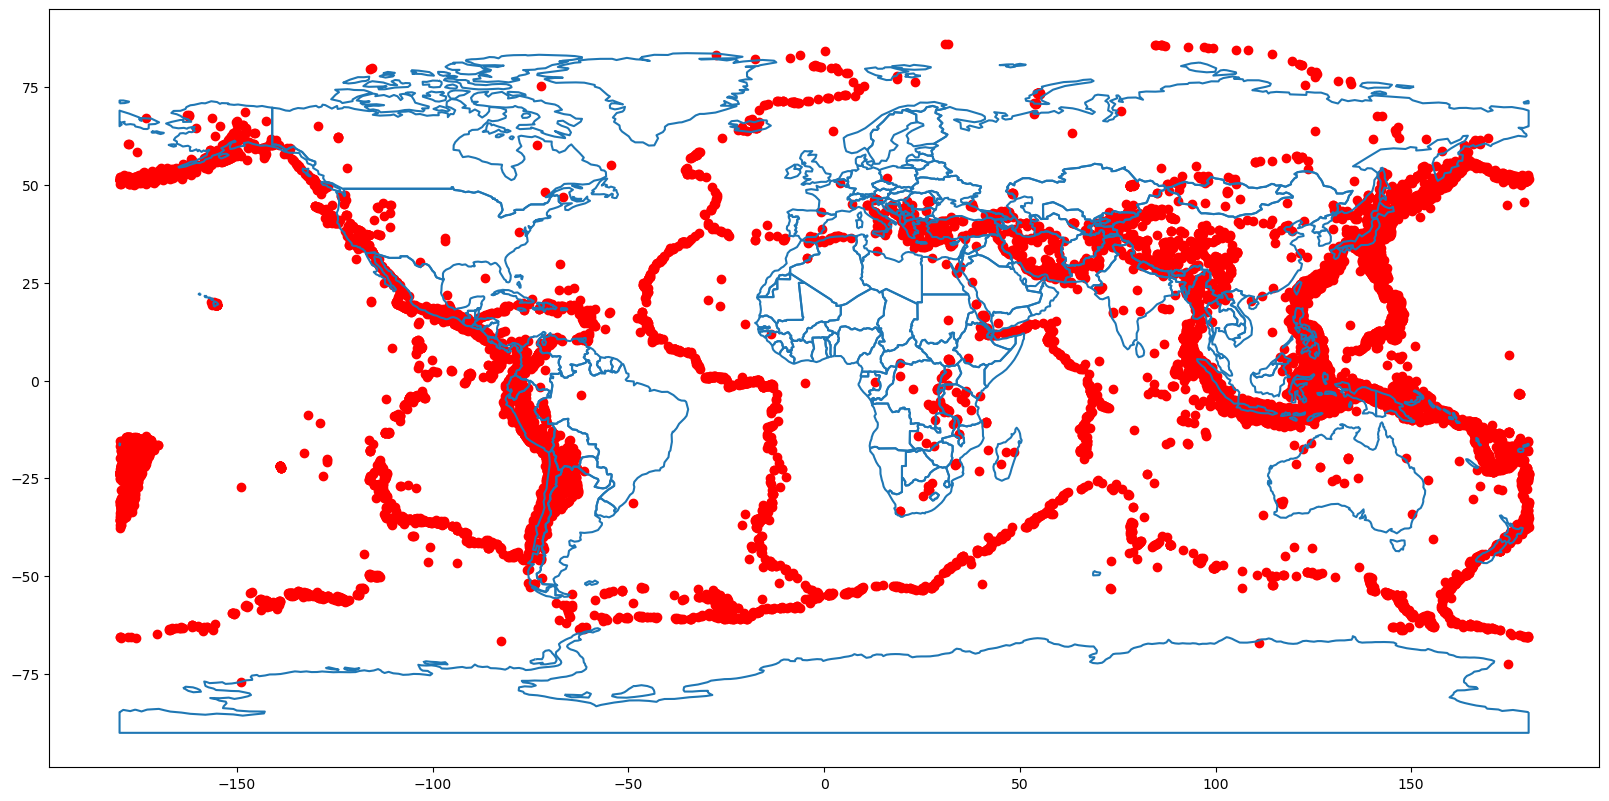

In [17]:
ax = df_world["geometry"].boundary.plot(figsize=(20,16))
# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

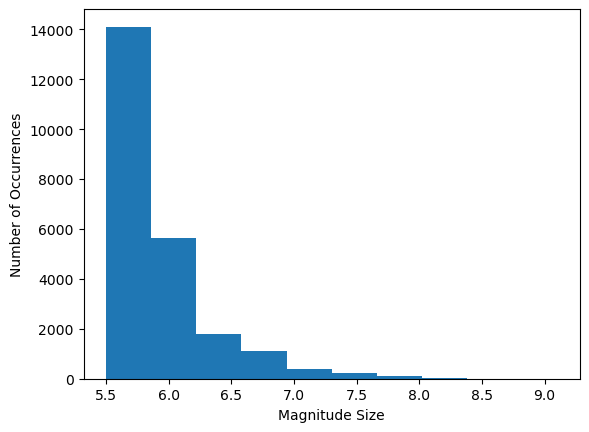

In [18]:
plt.hist(data['Magnitude'])

plt.xlabel('Magnitude Size')
plt.ylabel('Number of Occurrences')
plt.show()

In [19]:
data.loc[data['Magnitude'] >=8, 'Class'] = 'Disastrous'
data.loc[ (data['Magnitude'] >= 7) & (data['Magnitude'] < 7.9), 'Class'] = 'Major'
data.loc[ (data['Magnitude'] >= 6) & (data['Magnitude'] < 6.9), 'Class'] = 'Strong'
data.loc[ (data['Magnitude'] >= 5.5) & (data['Magnitude'] < 5.9), 'Class'] = 'Moderate'

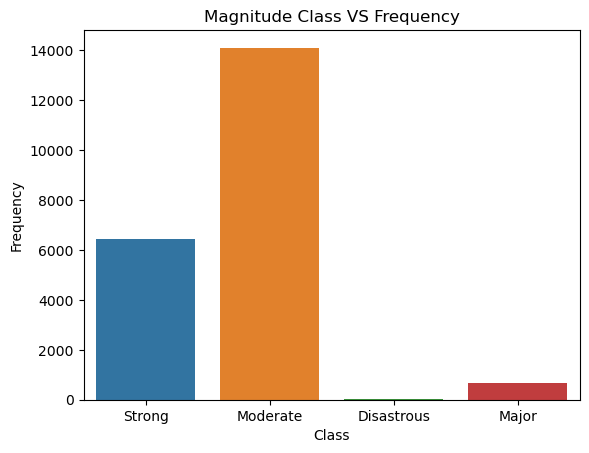

In [20]:
sns.countplot(x="Class", data=data)
plt.ylabel('Frequency')
plt.title('Magnitude Class VS Frequency')
plt.show()

In [21]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Latitude     23412 non-null  float64 
 1   Longitude    23412 non-null  float64 
 2   Magnitude    23412 non-null  float64 
 3   Coordinates  23412 non-null  geometry
 4   Class        21255 non-null  object  
dtypes: float64(3), geometry(1), object(1)
memory usage: 914.7+ KB


In [23]:
data.head()

,Latitude,Longitude,Magnitude,Coordinates,Class
0,19.246,145.616,6.0,POINT (145.61600 19.24600),Strong
1,1.863,127.352,5.8,POINT (127.35200 1.86300),Moderate
2,-20.579,-173.972,6.2,POINT (-173.97200 -20.57900),Strong
3,-59.076,-23.557,5.8,POINT (-23.55700 -59.07600),Moderate
4,11.938,126.427,5.8,POINT (126.42700 11.93800),Moderate


In [24]:
data.isnull().sum()

Latitude          0
Longitude         0
Magnitude         0
Coordinates       0
Class          2157
dtype: int64

In [25]:
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

# Label encoder

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Class']=le.fit_transform(data['Class'])
df['Status'] = le.fit_transform(df['Status'])

### Train Test Split

In [27]:
X = data[['Latitude', 'Longitude','Magnitude','Class']]
Y = df[['Status']]

In [28]:
X.head()

,Latitude,Longitude,Magnitude,Class
0,19.246,145.616,6.0,3
1,1.863,127.352,5.8,2
2,-20.579,-173.972,6.2,3
3,-59.076,-23.557,5.8,2
4,11.938,126.427,5.8,2


In [29]:
Y.value_counts()

Status
1         20773
0          2639
dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state= 10)

In [32]:
X_train.shape

(18729, 4)

In [78]:
X_train

,Latitude,Longitude,Magnitude,Class
21622,-10.8380,165.9690,6.8,3
11729,-6.8760,131.3400,6.3,3
2899,-2.9790,139.2680,5.7,2
22446,-37.6478,179.6621,6.7,3
20373,-8.7000,111.1970,5.6,2
...,...,...,...,...
9372,-44.4620,-78.7660,5.6,2
7291,-7.9930,102.2550,6.4,3
17728,-21.1780,169.6090,5.6,2
7293,-14.1690,171.3280,6.0,3


In [79]:
y_test

,Status
5872,1
6436,1
5435,1
7064,1
12873,1
...,...
250,0
15747,1
17591,1
8450,1


# MLP CLassifier model

In [33]:
#  Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000)

print(mlp.fit(X_train, y_train.values.ravel()))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')


In [34]:
print("TRAIN SET", mlp.score(X_train, y_train))

print("TEST  SET", mlp.score(X_test, y_test))

TRAIN SET 0.8873404880132415
TEST  SET 0.8870382233610933


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mlp, X, Y.values.ravel(), cv=4)

scores

array([0.88723731, 0.88723731, 0.88723731, 0.88740817])

In [36]:
print("Average: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average: 0.89 (+/- 0.00)


In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [64]:
def plot_confusion_matr(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['earthquake','earthquake not there']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[   0  529]
 [   0 4154]]


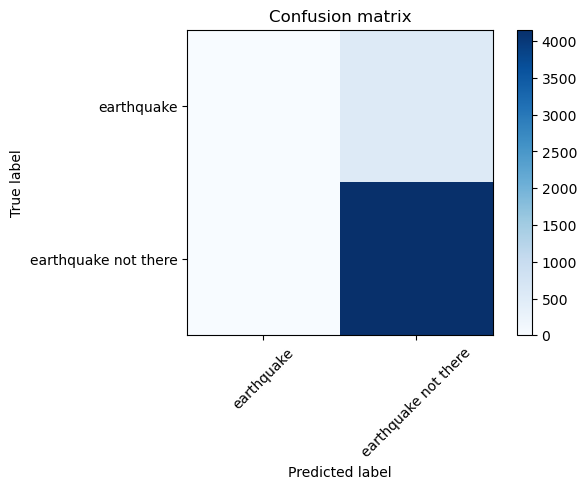

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, mlp.predict(X_test))
print(cm)
plot_confusion_matr(cm)

In [40]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0. 1.]
True Positive rate:  [0. 1.]


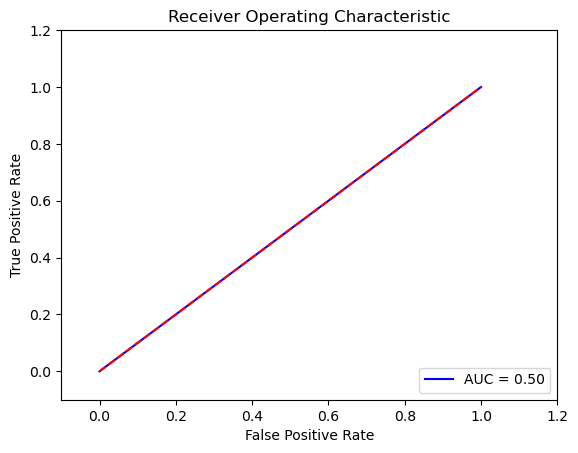

In [41]:
plot_roc_curve(y_test, mlp.predict(X_test))

In [42]:
print(classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       529
           1       0.89      1.00      0.94      4154

    accuracy                           0.89      4683
   macro avg       0.44      0.50      0.47      4683
weighted avg       0.79      0.89      0.83      4683



# Stochastic Gradient Descent

In [43]:
#  Stochastic Gradient Descent
from sklearn.linear_model import  SGDClassifier

sgd=SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)

In [44]:
sgd.fit(X_train, y_train.values.ravel()) 

SGDClassifier(loss='modified_huber', random_state=101)

In [45]:
print("TRAIN SET", sgd.score(X_train, y_train))
print("TEST  SET", sgd.score(X_test, y_test))

TRAIN SET 0.8566394361685087
TEST  SET 0.8535127055306427


In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd, X, Y.values.ravel(), cv=4)

scores

array([0.819238  , 0.73039467, 0.8062532 , 0.73090723])

In [47]:
print("Average: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average: 0.77 (+/- 0.08)


In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [67]:
def plot_confusion_mat(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['earthquake','earthquake not there']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[  32  497]
 [ 189 3965]]


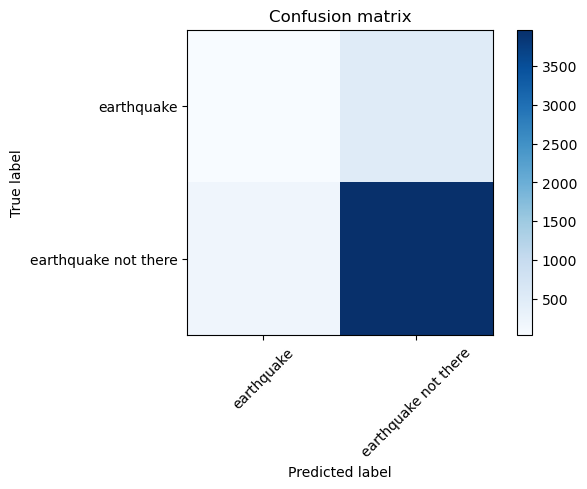

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, sgd.predict(X_test))
print(cm)
plot_confusion_mat(cm)

In [69]:
def plot_roc_cur(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0.         0.93950851 1.        ]
True Positive rate:  [0.         0.95450169 1.        ]


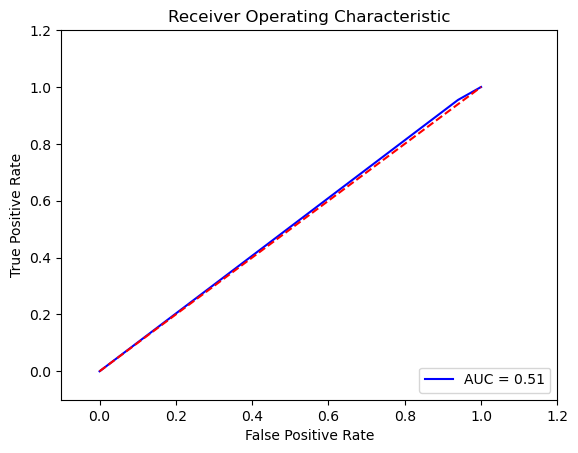

In [70]:
plot_roc_cur(y_test, sgd.predict(X_test))

In [53]:
print(classification_report(y_test, sgd.predict(X_test)))

              precision    recall  f1-score   support

           0       0.14      0.06      0.09       529
           1       0.89      0.95      0.92      4154

    accuracy                           0.85      4683
   macro avg       0.52      0.51      0.50      4683
weighted avg       0.80      0.85      0.83      4683



# XGBoost 

In [55]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[0]


1

In [56]:

# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

The Area under Precision Recall Curve Score is 0.8937316644002854


In [71]:
def plot_confusion(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['earthquake','earthquake not there']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[  38  491]
 [  23 4131]]


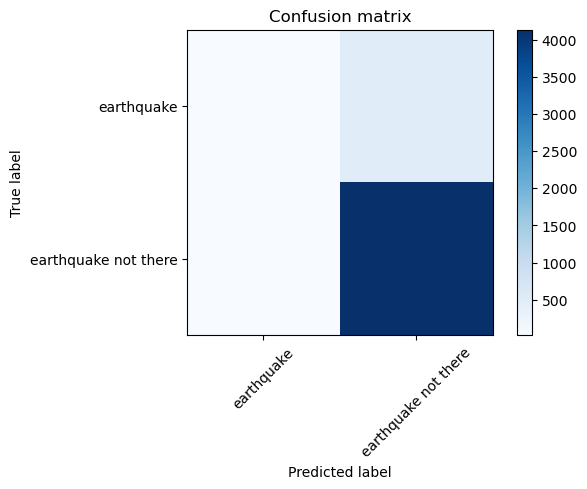

In [72]:
# looking at the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_test))
print(cm)
plot_confusion(cm)

In [83]:
test_vector = np.reshape(np.asarray([-10.8380,165.9690,6.8,3]),(1,4))
p = float(model.predict(test_vector)[0])
p

1.0